# Scikit-Learn 
- built on numpy and matplotlib
- has many built-in ML models
- methods to evaluate ML models
- well designed API


**Workflow**:

    1.) Get Data Ready
    2.) Pick an Estimator/Algorithm for the problem Model
    3.) Fit the Model/Algorithm
    4.) Evaluate the Model
    5.) Experiment/Compare/Improve Model
    6.) Save and Load Model to an Application

## Heart Disease

In [1]:
import pandas as pd
import numpy as np

In [2]:
heart_disease = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Create X (features matrix)
X = heart_disease.drop('target', axis=1)

# Create y (labels)
y = heart_disease["target"]

### Splitting the Data

    1. Split data into features and labels
    2. Filling/inputing/disregarding missing values
    3. Convert non-numerical values to numerical values (a.k.a. feature encoding)

In [4]:
# 1.
# Always split dev, val, test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [6]:
# 2.


In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
clf = RandomForestClassifier()

# Keep default hyperparams for now
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Fit the Model/Algorithm

In [9]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
# Make a prediction
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

In [11]:
y_test

33     1
5      1
291    0
298    0
51     1
      ..
178    0
300    0
23     1
225    0
83     1
Name: target, Length: 61, dtype: int64

### Evaluate the Model

In [12]:
clf.score(X_train, y_train)

1.0

In [13]:
clf.score(X_test, y_test)

0.819672131147541

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        33
           1       0.79      0.82      0.81        28

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [15]:
confusion_matrix(y_test, y_preds)

array([[27,  6],
       [ 5, 23]], dtype=int64)

In [16]:
accuracy_score(y_test, y_preds)

0.819672131147541

### Improve Model

In [17]:
# Tweak hyperparams
np.random.seed(42)

for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:0.2f} %");
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 81.97 %

Trying model with 20 estimators...
Model accuracy on test set: 85.25 %

Trying model with 30 estimators...
Model accuracy on test set: 88.52 %

Trying model with 40 estimators...
Model accuracy on test set: 85.25 %

Trying model with 50 estimators...
Model accuracy on test set: 83.61 %

Trying model with 60 estimators...
Model accuracy on test set: 86.89 %

Trying model with 70 estimators...
Model accuracy on test set: 85.25 %

Trying model with 80 estimators...
Model accuracy on test set: 86.89 %

Trying model with 90 estimators...
Model accuracy on test set: 83.61 %



### Save and Load Model

In [18]:
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [19]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.8360655737704918

## Car Sales (OHE)

In [20]:
car_sales = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [21]:
len(car_sales)

1000

In [22]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

#### Get Features/Label and Split Dataset

In [23]:
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Preprocess (fill NAs and turn categorical values to numerical)

In [24]:
 # OHE Method 1
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                                remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [25]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [26]:
# OHE Method 2
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


#### Choose an Estimator/Algorithm

In [27]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model = RandomForestRegressor()

#### Fit the Algorithm

In [28]:
model.fit(X_train, y_train)

RandomForestRegressor()

#### Evaluate the Algorithm

In [29]:
model.score(X_test, y_test)

0.3235867221569877

## Car Sales (Handle Missing Data)

    1. Fill missing data with some value (imputation)
    2. Remove samples with missing data altogether

In [30]:
# import car sales missing data
car_sales_missing = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


#### Check and Fill Missing Values

In [31]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

##### Fill Na Option 1: with Pandas

In [32]:
# fill "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# fill "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# fill "Odometer (KM) column"
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# fill "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)


In [33]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [34]:
# remove rows with missing "Price" value
car_sales_missing.dropna(inplace=True)

In [35]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

#### Create Features/Label

In [36]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [37]:
# OHE
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)], 
                               remainder = "passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

##### Fill na with Option 2: with Scikit-learn


In [38]:
car_sales_missing = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [39]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [40]:
car_sales_missing.dropna(subset=["Price"], inplace=True) # drop nan values that are in the subset of price column
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

#### Create Features/Label

In [41]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

#### Fill Missing Values

In [42]:
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy = "constant", fill_value = "missing")
door_imputer = SimpleImputer(strategy = "constant", fill_value = 4)
num_imputer = SimpleImputer(strategy = "mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [43]:
car_sales_filled = pd.DataFrame(filled_X, 
                               columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [44]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

#### Convert Categorical into Numbers

In [45]:
# OHE
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)], 
                               remainder = "passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

#### Split Dataset

In [46]:
np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

#### Choosing the Right Algorithm/Model

In [47]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

## CA Housing Dataset (Choosing a Regression Estimator/Algorithm/ML Model)

- Classification problem: tasked with predicitng a category (e.g. heart disease or not)
- Regression problem: tasked with predicting a number (e.g. price of a car)

Choosing your estimator roadmap:

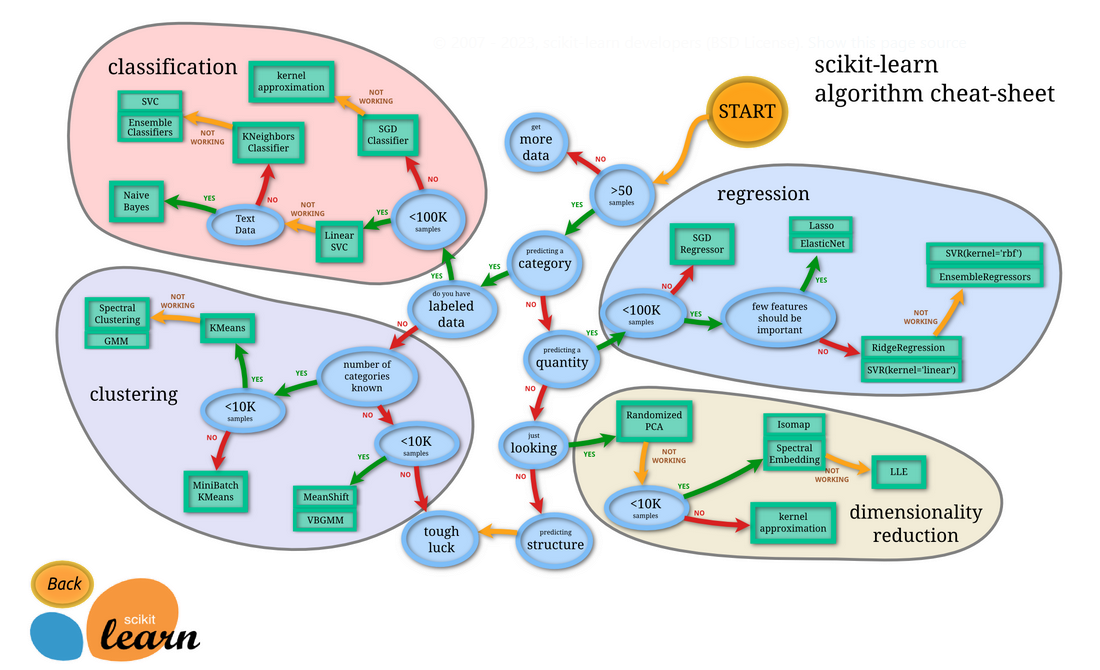

In [48]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [49]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])

In [50]:
housing_df['target'] = housing['target']
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


#### Split Dataset

In [51]:
from sklearn.model_selection import train_test_split
np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price in 100,000s

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Choosing the Model (Regression)

Follow that roadmap pic from above to decide which models to consider. 
Since we don't know which model is best, and what features are most important, try different estimators/models/algorithms to see which ones perform the best.

##### Try Ridge Regression (Fit, Evaluate)

In [52]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5758549611440125

##### Try Ensemble Regressors

An Ensemble is a combination of smaller models that tries to make one prediction. This is supposedly better than just one single model making a prediction.

In [53]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8065734772187598

##### Try Lasso

In [54]:
from sklearn import linear_model
model = linear_model.Lasso(alpha=0.1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5318167610318159

#### Try ElasticNet

In [55]:
model = linear_model.ElasticNet(random_state=0)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.41655189098028245

##### Try SGD Regressor

In [56]:
model = linear_model.SGDRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

-7.457601471698282e+28

## Heart Disease (Choosing an Classification Estimator)

In [57]:
heart_disease = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [58]:
len(heart_disease)

303

### Create Features/Label and Split Dataset

In [59]:
from sklearn.model_selection import train_test_split

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Choose an Estimator (Fit, Evaluate)

#### Try Linear SVC

In [60]:
from sklearn.svm import LinearSVC
np.random.seed(42)

model = LinearSVC()
model.fit(X_train, y_train)
model.score(X_test, y_test)

C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8524590163934426

#### Try Ensemble Classifiers

In [61]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8032786885245902

**If you have structured data, use ensemble methods. If you have unstructured data, use deep learning or transfer learning.**

## Heart Disease (Fitting Model to Data)

You know what to call on scikit-learn to fit the data, but you should be able to descibe/showcase what is under the hood of `fit()`. 

Make sure you understand the concept of forward pass and backpropagation. Be prepared to write it out in scratch, and do some math. 

```
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

model = RandomForestClassifier()
```

**model.fit(X_train, y_train)**
```
model.score(X_test, y_test)
```

### Make Classification Predictions with the Model

#### Option 1: `predict()`

In [62]:
X_test.head(), X_test.shape

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak   
 233   64    1   0       120   246    0        0       96      1      2.2  \
 30    41    0   1       105   198    0        1      168      0      0.0   
 279   61    1   0       138   166    0        0      125      1      3.6   
 81    45    1   1       128   308    0        0      170      0      0.0   
 229   64    1   2       125   309    0        1      131      1      1.8   
 
      slope  ca  thal  
 233      0   1     2  
 30       2   1     2  
 279      1   1     2  
 81       2   0     2  
 229      1   0     3  ,
 (61, 13))

In [63]:
model.predict(X_test) # this is our prediction for X_test array

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

In [64]:
# Compare predictions to truth labels
y_preds = model.predict(X_test)

# the following is the equivalent of: 
# model.score(X_test, y_test)
np.mean(y_preds == y_test) # get the average of correct predictions between y_preds and y_test

0.8032786885245902

In [65]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_preds) # still the equivalent. 

0.8032786885245902

#### Option 2: `predict_proba()`

This returns probabilities of a classification label.
Useful to use if you only want to know which labels have a probability higher than X%. Maybe good for debugging/experimenting/tweaking the model.

In [66]:
model.predict_proba(X_test[:5]) # gives you the probability percentage for each label (no heart disease, yes heart disease)

array([[0.89, 0.11],
       [0.16, 0.84],
       [0.99, 0.01],
       [0.05, 0.95],
       [0.67, 0.33]])

In [67]:
model.predict(X_test[:5]) # just gives you the prediction label 

array([0, 1, 0, 1, 0], dtype=int64)

## CA Housing Market (Making Regression Predictions with Our Model)

In [68]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [69]:
housing_df = pd.DataFrame(housing['data'], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [70]:
housing_df["target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8065734772187598

In [74]:
y_preds = model.predict(X_test)

In [75]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_preds) # on avg, each one of the model predicts is 0.32 different from the actual test value. 

0.32659871732073664

## Evaluating ML Model Score

The 3 ways to evaluate an ML model:

    1. Estimator's build-in `score()` method
    2. The `scoring` parameter
    3. Problem-specific metric funcitons

####  built-in score() for classification

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)
model.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [77]:
model.score(X_train, y_train) # The highest value is 1.0, lowest value is 0.0

1.0

In [78]:
model.score(X_test, y_test)

0.8524590163934426

#### build-in score() method for regression problem

In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = housing_df.drop("target", axis=1)
y = housing_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.predict(X_test)

array([1.7471   , 1.23883  , 2.3511001, ..., 2.8758201, 1.60219  ,
       1.84951  ])

In [80]:
model.score(X_train, y_train)

0.9729067522564939

In [81]:
model.score(X_test, y_test)

0.8095334567787089

The default score() evaluation metrics is R_squared for regression algorithms 

Highest = 1.0, lowest = 0.0

#### Scoring Parameters

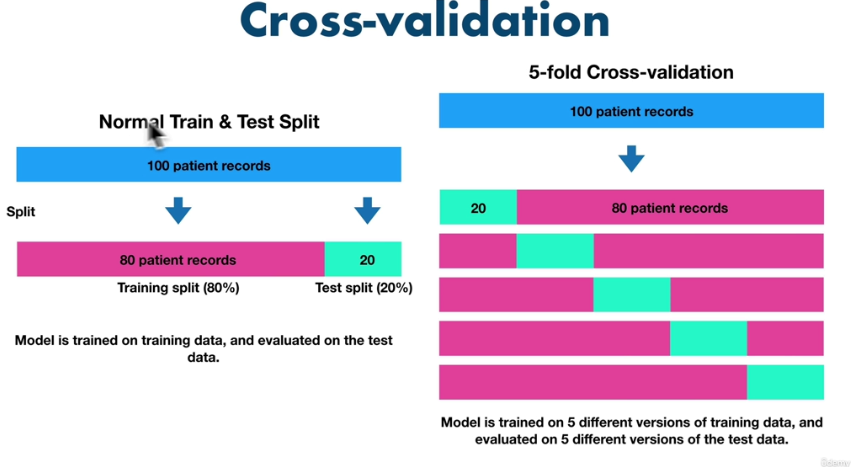

In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train);


In [83]:
model.score(X_test, y_test)

0.8524590163934426

In [84]:
cross_val_score(model, X, y) # 5 different scores for 5 different versions of the training data

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [85]:
np.random.seed(42)

# get single training and test split score
model_single_score = model.score(X_test, y_test)

# take the mean of 5-fold CV
model_cross_val_score = np.mean(cross_val_score(model, X, y)) # default scoring parameter = mean accuracy

# compare the two
model_single_score, model_cross_val_score # you should prefer the CV metric over the single score

(0.8524590163934426, 0.8248087431693989)

### Classification Evaluation Metrics -- Accuracy
1. Accuracy
2. Area under ROC curve
3. Confusion Matrix
4. Classification Report




#### Accuracy

In [86]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


model = RandomForestClassifier()
cross_val_score = cross_val_score(model, X, y)

In [87]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100} %")
print(f"this score shows that-- given a sample the model hasn't seen before, it is {np.mean(cross_val_score) * 100}% likely to predict the right label.")

Heart Disease Classifier Cross-Validated Accuracy: 82.15300546448088 %
this score shows that-- given a sample the model hasn't seen before, it is 82.15300546448088% likely to predict the right label.


#### ROC (a.k.a. AUC)

Area under the receiver operating characteric curve

ROC is a comparison of the model's true positive rate (TPR) Vs false positive rate (FPR). 

- True Positive = model predicts 1 when truth is 1
- True Negative = model predicts 0 when truth is 0
- False Positive = model predicts 1 when truth is 0
- False Negative = model predicts 0 when truth is 1

In [89]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [91]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = model.predict_proba(X_test)

y_probs[:10]

array([[0.94, 0.06],
       [0.42, 0.58],
       [0.51, 0.49],
       [0.89, 0.11],
       [0.23, 0.77],
       [0.16, 0.84],
       [0.25, 0.75],
       [0.96, 0.04],
       [0.98, 0.02],
       [0.51, 0.49]])

In [93]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.06, 0.58, 0.49, 0.11, 0.77, 0.84, 0.75, 0.04, 0.02, 0.49])

In [94]:
# Calculate fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03448276, 0.03448276,
       0.06896552, 0.06896552, 0.10344828, 0.10344828, 0.17241379,
       0.17241379, 0.17241379, 0.24137931, 0.24137931, 0.27586207,
       0.55172414, 0.68965517, 0.72413793, 0.72413793, 0.79310345,
       0.89655172, 0.96551724, 1.        ])

In [95]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
        Plot a ROC curve given the false positive rate (fpr)
        and true positive rate (tpr) of model
    """
    # Plot ROC Curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    
    # plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize plot
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic ROC Curve")
    plt.legend()
    plt.show()

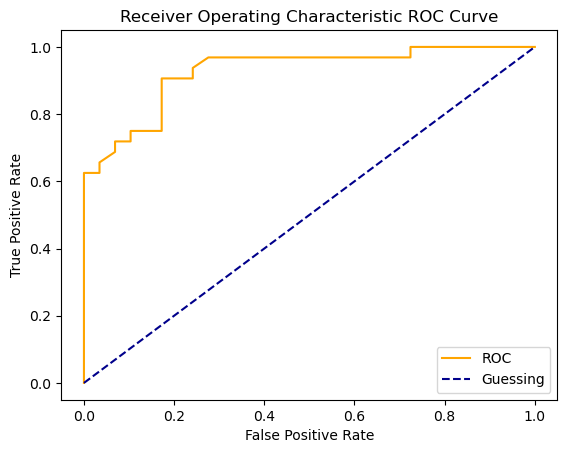

In [96]:
plot_roc_curve(fpr, tpr)

In [98]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9267241379310345

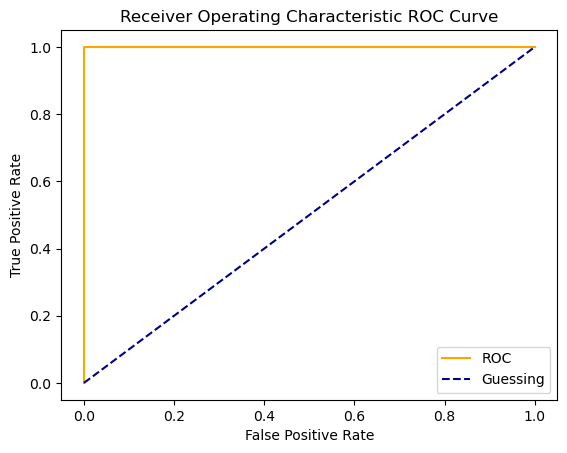

In [99]:
# Plot perfect ROC curve and AUC score
fpr, tpr, threshold = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [100]:
# perfect AUC score
roc_auc_score(y_test, y_test)

1.0

#### Confusion Matrix

This is a chart to compare the labels a model predicts, and the actual labels it was supposed to predict. 

In [101]:
from sklearn.metrics import confusion_matrix

y_preds = model.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 5, 27]], dtype=int64)

In [102]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test, y_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,5,27


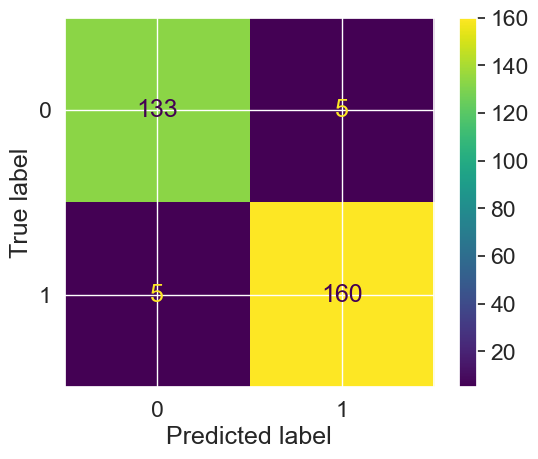

In [108]:
# Make our confusion matrix more visual with Scikit-learn
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=model,
                                     X=X, y=y)

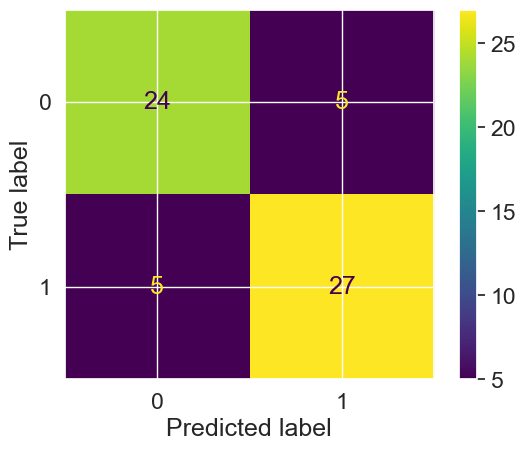

In [109]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                        y_pred=y_preds)

#### Classification Report

In [110]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [111]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize:
- Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples)
- Preivison and recall become more important when classes are imbalanced.
- If false positive predictions are worse than false negatives, aim for higher precision.
- If false negative predictions are worse than false positives, aim for higher recall.
- F1-Score is a combination of precision and recall. 

### Regression Model Evaluation Metrics

1. R_squared score
2. Mean Absolute Error (MAE)
3. Mean Squared Error (MSE)

#### R_squared Score
Compare your models' predictions to the mean of the targets.
Perfect model = 1.0. Poor model = negative numbers
If the model only predicts the mean of the targets, R_squared is 0.

In [112]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop('target', axis=1)
y = housing_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [118]:
y_preds = model.score(X_test, y_test)

In [114]:
from sklearn.metrics import r2_score

# fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [115]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [116]:
r2_score(y_true=y_test, y_pred=y_test_mean)

0.0

In [117]:
r2_score(y_true=y_test, y_pred=y_test)

1.0

#### Mean Absolute Error

MAE is the average of the absolute differences between predictions and actual values. It gives you an idea of how WRONG your model's predictions are.

In [120]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)

mae = mean_absolute_error(y_test, y_preds)
mae

0.32659871732073664

In [122]:
df = pd.DataFrame(data={"actual values": y_test,
                       "predicted_values": y_preds})

df['differences'] = df['predicted_values'] - df['actual values']
df.head(10)

,actual values,predicted_values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [124]:
# MAE using formulas and differences
np.abs(df["differences"]).mean()

0.32659871732073664

#### Mean Squared Error

In [125]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_preds)

In [126]:
df = pd.DataFrame({"actual_values": y_test,
                  "predicted_values": y_preds})

df['differences'] = df['predicted_values'] - df['actual_values']
df.head(10)

,actual_values,predicted_values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [127]:
np.abs(df['differences']).mean()

0.32659871732073664

In [128]:
df['squared_differences'] = np.square(df["differences"])
df.head()

,actual_values,predicted_values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [129]:
squared = np.square(df["differences"])
squared.mean()

0.2534678520824551

In [132]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"] = 16

In [133]:
df_large_error

,actual_values,predicted_values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [134]:
# calculate MSE with large error
df_large_error["squared_differences"].mean()

0.2573437523766412

In [135]:
df_large_error.iloc[1:100] = 20

In [136]:
df_large_error

,actual_values,predicted_values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [137]:
df_large_error["squared_differences"].mean()

0.7334180712088106

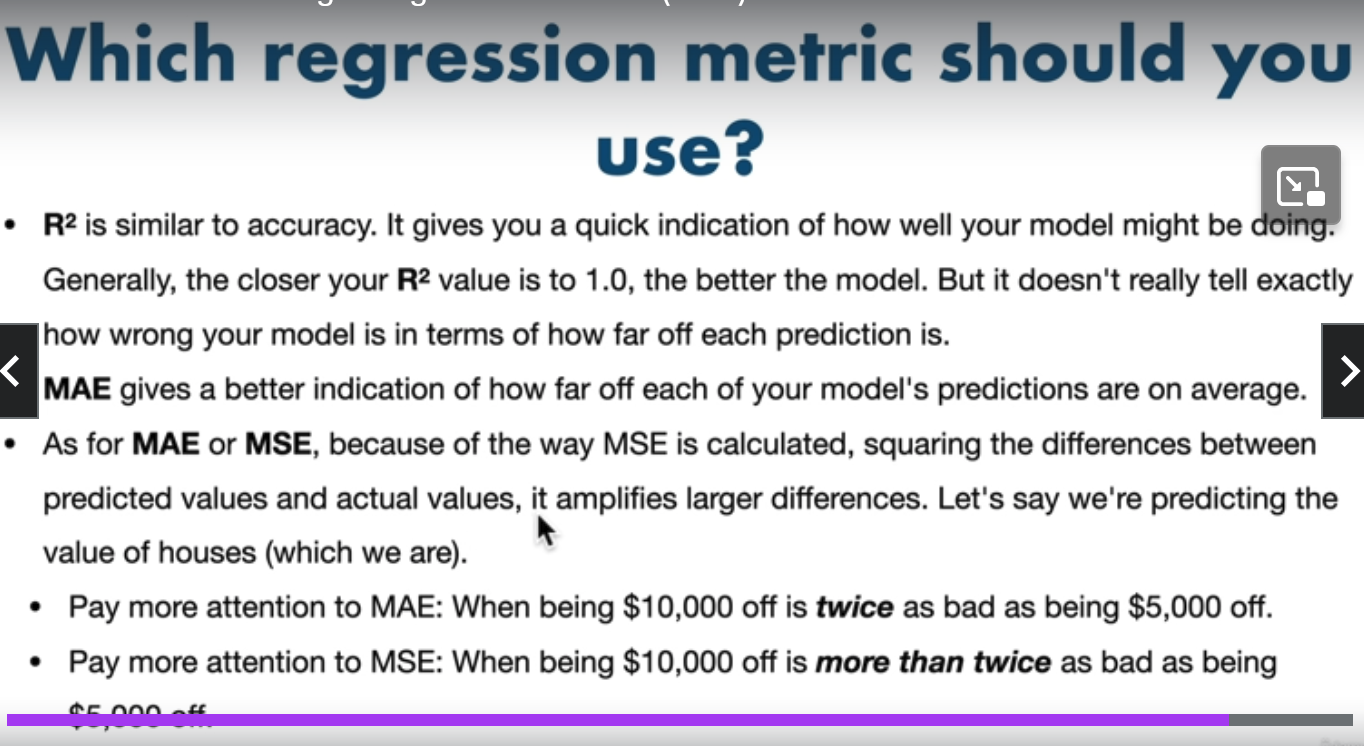

### Scoring Parameter